# Data Loading

In [1]:
import os
import pandas as pd

In [2]:
DF = pd.read_csv('/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv')

In [3]:
columns_to_drop = DF.columns[DF.nunique()==1]
DF_cleaned = DF.drop(columns=columns_to_drop)

# Data Cleaning

In [4]:
DF_cleaned.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Exploratory Data Analysis

In [5]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
warnings.simplefilter(action="ignore", category=FutureWarning)

## Attrition Status

### Data distribution in terms of attrition

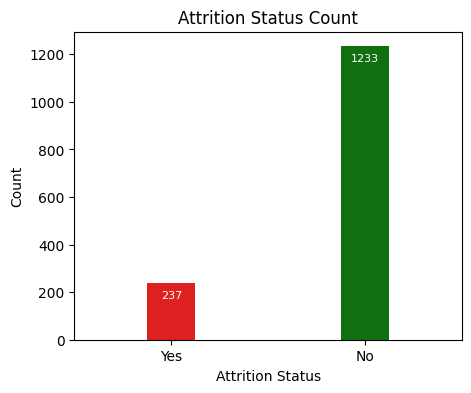

In [7]:
plt.figure(figsize=(5,4))
custom_colour_scheme = {"No": "green", "Yes": "red"}

ax = sns.countplot(x="Attrition", data=DF_cleaned, palette=custom_colour_scheme, width=0.25)

plt.title("Attrition Status Count")
plt.xlabel("Attrition Status")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        xy=(p.get_x() + p.get_width()/2, height),
        ha="center",
        va="top",
        xytext=(0, -5),
        textcoords="offset points",
        fontsize=8,
        color="white"
                )

plt.show()

**Observation:** The data provided is skewed in nature, therefore, a resampling technique (preferrably upsampling) will be required sp that the class imbalance is neutralized.

### Spread of age and trend of attrition

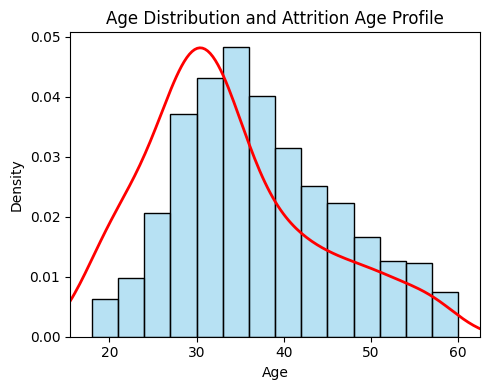

In [8]:
plt.figure(figsize=(5,4))

sns.histplot(
    data=DF_cleaned,
    x="Age",
    binwidth=3,
    kde=False,
    stat='density',
    color='skyblue',
    alpha=0.6,
    label="Overall Employee Age Distribution"
            )

sns.kdeplot(
    data=DF_cleaned[DF_cleaned.Attrition=="Yes"],
    x="Age",
    color="red",
    linewidth=2,
    label="Age Distribution of Attrited Employees"
            )

plt.xlim(DF_cleaned.Age.min()-2.5, DF_cleaned.Age.max()+2.5)

plt.title("Age Distribution and Attrition Age Profile")

plt.tight_layout()
plt.show()

**Observation**: The highest employee count is between age 30 and 40, however, the attrition has a right skewness with highest rate around age 30.

### Distance to home spread

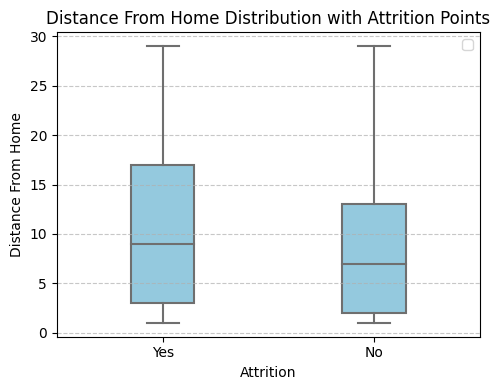

In [9]:
plt.figure(figsize=(5, 4))

sns.boxplot(
    x=DF_cleaned['Attrition'],
    y=DF_cleaned['DistanceFromHome'],
    color='skyblue',
    width=0.3
            )

plt.title('Distance From Home Distribution with Attrition Points')
plt.ylabel('Distance From Home')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Obervation:** Distance from home to workplace demonstrates a measurable impact on attrition probability, indicating geographical accessibility affects employee retention.

### Department and educational field distribution for attrited employees

In [10]:
DF_attrited = DF_cleaned[DF_cleaned["Attrition"] == "Yes"]
dept_attrition_counts = DF_attrited['Department'].value_counts()
dept_total_counts = DF_cleaned['Department'].value_counts()
departments = dept_total_counts.index
total_counts = dept_total_counts.values
attrition_counts = [dept_attrition_counts.get(dept, 0) for dept in departments]

dept_short = {'Research & Development': 'R&D', 'Sales': 'Sales', 'Human Resources': 'HR'}
short_names = [dept_short.get(dept, dept) for dept in departments]

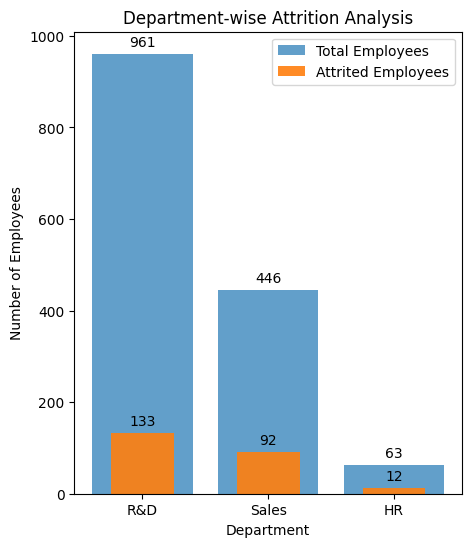

In [11]:
plt.figure(figsize=(5, 6))
x_pos = range(len(departments))
bars1 = plt.bar(x_pos, total_counts, alpha=0.7, label='Total Employees', width=0.8)
bars2 = plt.bar(x_pos, attrition_counts, alpha=0.9, label='Attrited Employees', width=0.5)

for i, (total, attrited) in enumerate(zip(total_counts, attrition_counts)):
    plt.text(i, total + max(total_counts)*0.01, str(total), ha='center', va='bottom')
    if attrited > 0:
        plt.text(i, attrited + max(total_counts)*0.01, str(attrited), ha='center', va='bottom')

plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Department-wise Attrition Analysis')
plt.xticks(x_pos, short_names)
plt.legend()
plt.show()

### Change in the rate of attrition with respect to the performance rating

In [12]:
perf_attrition_counts = DF_attrited['PerformanceRating'].value_counts()
perf_total_counts = DF_cleaned['PerformanceRating'].value_counts()
performance_ratings = perf_total_counts.index
total_counts = perf_total_counts.values
attrition_counts = [perf_attrition_counts.get(rating, 0) for rating in performance_ratings]

rating_labels = {1: 'Poor', 2: 'Below Avg', 3: 'Good', 4: 'Excellent'}
short_names = [rating_labels.get(rating, str(rating)) for rating in performance_ratings]

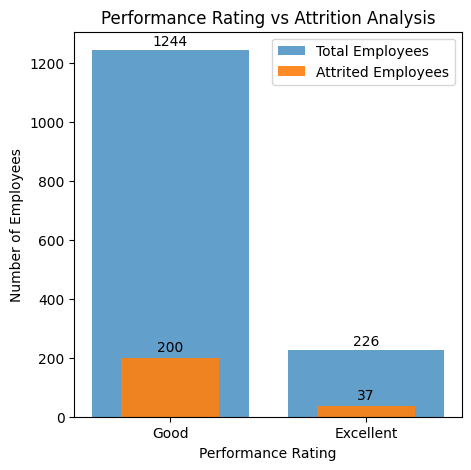

In [13]:
plt.figure(figsize=(5, 5))
x_pos = range(len(performance_ratings))
bars1 = plt.bar(x_pos, total_counts, alpha=0.7, label='Total Employees', width=0.8)
bars2 = plt.bar(x_pos, attrition_counts, alpha=0.9, label='Attrited Employees', width=0.5)

for i, (total, attrited) in enumerate(zip(total_counts, attrition_counts)):
    plt.text(i, total + max(total_counts)*0.005, str(total), ha='center', va='bottom')
    if attrited > 0:
        plt.text(i, attrited + max(total_counts)*0.01, str(attrited), ha='center', va='bottom')

plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.title('Performance Rating vs Attrition Analysis')
plt.xticks(x_pos, short_names)
plt.legend()
plt.show()

**Observation:** Employees fall under either 3 or 4 rating, with 84.6% falling under 3 rating. However, the attrition rate for both the ratings is the same. Therefore, there is no direct correlation between both the parameters.

### Attrition per department

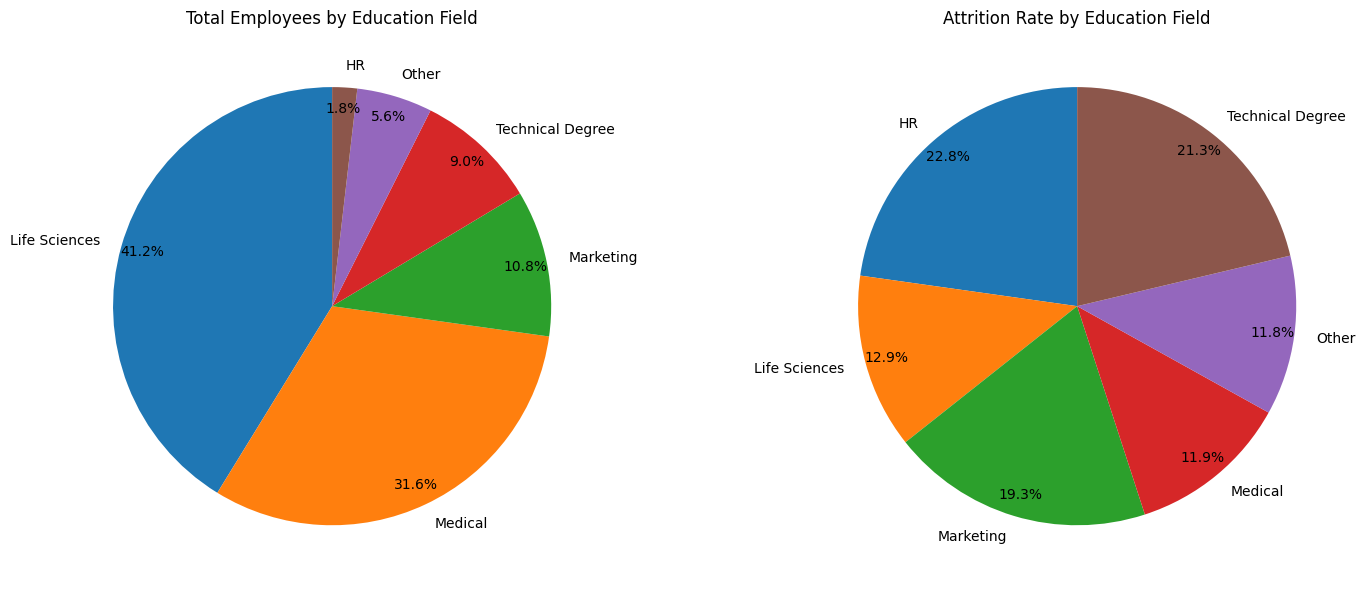

In [14]:
edu_total_counts = DF_cleaned['EducationField'].value_counts()
edu_attrition_counts = DF_attrited['EducationField'].value_counts()

attrition_rates = (edu_attrition_counts / edu_total_counts) * 100
attrition_rates = attrition_rates.fillna(0)
attrition_rates = attrition_rates.sort_index()

total_labels = [label.replace('Human Resources', 'HR') for label in edu_total_counts.index]
attrition_labels = [label.replace('Human Resources', 'HR') for label in attrition_rates.index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(edu_total_counts.values, labels=total_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.9)
ax1.set_title('Total Employees by Education Field')

ax2.pie(attrition_rates.values, labels=attrition_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.9)
ax2.set_title('Attrition Rate by Education Field')

plt.tight_layout()
plt.show()

**Observation:** HRs and technical degree holders have the highest attrition with 44.1% as the aggregated percentage for both the departments.

# Data Preprocessing

In [15]:
def ManualOrdinalEncoding(dataframe, column, mapping):
    encoded = dataframe[column].map(mapping)
    dataframe[column] = encoded

In [16]:
AttritionMap = {"No": 0, "Yes": 1}

ManualOrdinalEncoding(DF_cleaned, "Attrition", AttritionMap)

## Ordinal Encoding

In [17]:
Attrition_True = (DF_cleaned.Attrition == 1)

### Business Travel

In [18]:
Non_Travel_Count = (DF_cleaned.BusinessTravel == "Non-Travel")
Travel_Rarely_Count = (DF_cleaned.BusinessTravel == "Travel_Rarely")
Travel_Frequently_Count = (DF_cleaned.BusinessTravel == "Travel_Frequently")

Non_Travel_Attrition_Count = DF_cleaned[Non_Travel_Count&Attrition_True].shape[0]
Travel_Rarely_Attrition_Count = DF_cleaned[Travel_Rarely_Count&Attrition_True].shape[0]
Travel_Frequently_Attrition_Count = DF_cleaned[Travel_Frequently_Count&Attrition_True].shape[0]

In [19]:
print(Non_Travel_Count.sum(), Travel_Rarely_Count.sum(), Travel_Frequently_Count.sum())
print(Non_Travel_Attrition_Count, Travel_Rarely_Attrition_Count, Travel_Frequently_Attrition_Count)

150 1043 277
12 156 69


In [20]:
Travel_Rarely_Frequency = Travel_Rarely_Attrition_Count/Travel_Rarely_Count.sum()
Travel_Frequently_Frequency = Travel_Frequently_Attrition_Count/Travel_Frequently_Count.sum()

print(Travel_Rarely_Frequency, Travel_Frequently_Frequency)

0.14956855225311602 0.2490974729241877


In [21]:
BusinessTravelMap = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}

ManualOrdinalEncoding(DF_cleaned, "BusinessTravel", BusinessTravelMap)

### OverTime

In [22]:
DF_cleaned.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [23]:
Over_Time_False_Count = (DF_cleaned.OverTime == "No")
Over_Time_True_Count = (DF_cleaned.OverTime == "Yes")

Over_Time_False_Attrition_Count = DF_cleaned[Over_Time_False_Count&Attrition_True].shape[0]
Over_Time_True_Attrition_Count = DF_cleaned[Over_Time_True_Count&Attrition_True].shape[0]

In [24]:
Over_Time_False_Frequency = Over_Time_False_Attrition_Count/Over_Time_False_Count.sum()
Over_Time_True_Frequency = Over_Time_True_Attrition_Count/Over_Time_True_Count.sum()

print(Over_Time_False_Frequency, Over_Time_True_Frequency)

0.10436432637571158 0.30528846153846156


In [25]:
OverTimeMap = {"No": 0, "Yes": 1}

ManualOrdinalEncoding(DF_cleaned, "OverTime", OverTimeMap)

### MaritalStatus

In [26]:
DF_cleaned.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [27]:
Marital_Status_Single_Count = (DF_cleaned.MaritalStatus == "Single")
Marital_Status_Married_Count = (DF_cleaned.MaritalStatus == "Married")
Marital_Status_Divorced_Count = (DF_cleaned.MaritalStatus == "Divorced")

Marital_Status_Single_Attrition_Count = DF_cleaned[Marital_Status_Single_Count&Attrition_True].shape[0]
Marital_Status_Married_Attrition_Count = DF_cleaned[Marital_Status_Married_Count&Attrition_True].shape[0]
Marital_Status_Divorced_Attrition_Count = DF_cleaned[Marital_Status_Divorced_Count&Attrition_True].shape[0]

In [28]:
Marital_Status_Single_Frequency = Marital_Status_Single_Attrition_Count/Marital_Status_Single_Count.sum()
Marital_Status_Married_Frequency = Marital_Status_Married_Attrition_Count/Marital_Status_Married_Count.sum()
Marital_Status_Divorced_Frequency = Marital_Status_Divorced_Attrition_Count/Marital_Status_Divorced_Count.sum()

In [29]:
print(Marital_Status_Single_Frequency, Marital_Status_Married_Frequency, Marital_Status_Divorced_Frequency)

0.2553191489361702 0.12481426448736999 0.10091743119266056


In [30]:
MaritalStatusMap = {"Single": 2, "Married": 1, "Divorced": 0}

ManualOrdinalEncoding(DF_cleaned, "MaritalStatus", MaritalStatusMap)

### Downloading the dataframe to CSV

In [31]:
DF_num_col = DF_cleaned.select_dtypes(exclude="object")

#output_csv_file = "numerical_data.csv"
#DF_cleaned.to_csv(output_csv_file, index=False)

### Pearson Correlaion

In [32]:
pearson_corr = DF_num_col.corr()

In [33]:
#pearson_corr

From the above correlation table, we can reject: HourlyRate, DailyRate, MonthlyRate, PercentSalaryHike, PerformanceRating, EmployeeNumber and YearsSinceLastPromotion.

In [34]:
weakly_corr_col = ["HourlyRate", "DailyRate", "MonthlyRate", "PercentSalaryHike", "PerformanceRating", "EmployeeNumber", "YearsSinceLastPromotion"]

DF_cleaned_backed = DF_cleaned.copy()
DF_cleaned.drop(columns=weakly_corr_col, inplace=True)

## Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
LE = LabelEncoder()

In [37]:
num_col = DF_cleaned.select_dtypes(exclude='object').columns
cat_col = DF_cleaned.select_dtypes(include='object').columns

In [38]:
for col in cat_col:
    DF_cleaned[col] = LE.fit_transform(DF_cleaned[col])

## Data Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
DF_train, DF_test = train_test_split(DF_cleaned, test_size=0.25, train_size=None, random_state=None, shuffle=True, stratify=None)

## Upsample

In [41]:
from sklearn.utils import resample

In [42]:
DF_train_minority = DF_train[DF_train['Attrition']==1]
DF_train_majority = DF_train[DF_train['Attrition']==0]

In [43]:
resampled_DF_train_minority = resample(DF_train_minority, replace=True, n_samples=len(DF_train_majority), random_state=42)

In [44]:
from sklearn.utils import shuffle

In [45]:
resampled_DF_train = pd.concat([resampled_DF_train_minority, DF_train_majority])
resampled_DF_train = resampled_DF_train.sample(frac=1, random_state=42)

In [46]:
X_train, y_train = resampled_DF_train.drop("Attrition", axis=1, inplace=False), resampled_DF_train["Attrition"]
X_test, y_test = DF_test.drop("Attrition", axis=1, inplace=False), DF_test["Attrition"]

# Model Training

In [47]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test)

KF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
def objective(trial):
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    if solver == 'lbfgs' and penalty == 'l1':
        raise optuna.exceptions.TrialPruned("LBFGS does not support L1 penalty.")
    if solver == 'saga' and penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    else:
        l1_ratio = None

    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    classifier = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        class_weight=class_weight,
        l1_ratio=l1_ratio,
        random_state=42,
        max_iter=1000,
        n_jobs=-1
    )

    roc_auc_scores = []
    for fold, (train_index_inner, val_index_inner) in enumerate(KF.split(X_train_scaled, y_train)):
        X_train_fold, X_val_fold = X_train_scaled.iloc[train_index_inner], X_train_scaled.iloc[val_index_inner]
        y_train_fold, y_val_fold = y_train.iloc[train_index_inner], y_train.iloc[val_index_inner]

        classifier.fit(X_train_fold, y_train_fold)
        y_pred_proba_fold = classifier.predict_proba(X_val_fold)[:, 1]
        roc_auc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
        roc_auc_scores.append(roc_auc_fold)

    return sum(roc_auc_scores) / len(roc_auc_scores)

In [50]:
study = optuna.create_study(direction='maximize')

print("Starting Logistic Regression hyperparameter optimization with Optuna and K-Fold Cross-Validation on X_train_scaled...")
study.optimize(objective, n_trials=50)

print("Optimization finished.")
print(f"Number of finished trials: {len(study.trials)}")

print("Best Logistic Regression trial (from cross-validation on X_train_scaled):")
trial = study.best_trial

print(f"  Value (Mean ROC AUC): {trial.value:.4f}")
print("  Best hyperparameters:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-07-23 16:00:01,514] A new study created in memory with name: no-name-dfada5b8-4c09-4675-ad37-baea244f1469


Starting Logistic Regression hyperparameter optimization with Optuna and K-Fold Cross-Validation on X_train_scaled...


[I 2025-07-23 16:00:04,381] Trial 0 finished with value: 0.8551984877126653 and parameters: {'C': 1.971697402368192, 'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None}. Best is trial 0 with value: 0.8551984877126653.
[I 2025-07-23 16:00:04,545] Trial 1 finished with value: 0.8549681001890359 and parameters: {'C': 50.35882800187015, 'solver': 'saga', 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8551984877126653.
[I 2025-07-23 16:00:04,547] Trial 2 pruned. LBFGS does not support L1 penalty.
[I 2025-07-23 16:00:04,651] Trial 3 finished with value: 0.5 and parameters: {'C': 0.0004985051133233246, 'solver': 'saga', 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8551984877126653.
[I 2025-07-23 16:00:04,806] Trial 4 finished with value: 0.8549976370510397 and parameters: {'C': 19.344033738575394, 'solver': 'saga', 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8551984877126653.
[I 2025-07-23 16:00:

Optimization finished.
Number of finished trials: 50
Best Logistic Regression trial (from cross-validation on X_train_scaled):
  Value (Mean ROC AUC): 0.8561
  Best hyperparameters:
    C: 0.08340495293759095
    solver: liblinear
    penalty: l2
    class_weight: balanced


In [51]:
print("--- Final Model Training and Evaluation ---")
best_params = study.best_trial.params
if best_params.get('solver') != 'saga' or best_params.get('penalty') != 'elasticnet':
    best_params.pop('l1_ratio', None)

final_classifier = LogisticRegression(
    **best_params,
    random_state=42,
    max_iter=1000
)

final_classifier.fit(X_train_scaled, y_train)

y_pred_proba_final_test = final_classifier.predict_proba(X_test_scaled)[:, 1]
final_roc_auc_test = roc_auc_score(y_test, y_pred_proba_final_test)

print(f"Final Model ROC AUC on X_test_scaled: {final_roc_auc_test:.4f}")


print("--- Classification Report on X_test_scaled ---")
y_pred_final_test = final_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred_final_test))

--- Final Model Training and Evaluation ---
Final Model ROC AUC on X_test_scaled: 0.7809
--- Classification Report on X_test_scaled ---
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       313
           1       0.30      0.60      0.40        55

    accuracy                           0.73       368
   macro avg       0.61      0.68      0.61       368
weighted avg       0.82      0.73      0.76       368



**Conclusion:** With the above trained logistic regression model, we have achieved an ROC of 80.76% and 72% recall for class 1 predicitions.